<a href="https://colab.research.google.com/github/Piyushvishnoi/Python_Pandas_Project/blob/main/Final_project_panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install required libraries
import pandas as pd

# Step 2: Download the Chipotle dataset
data = pd.read_csv("/chipotle.tsv", sep="\t")

In [2]:
# Step 3: Display basic information
print("🔹 First 5 Rows of Dataset:")
display(data.head())

print("\n🔹 Dataset Summary:")
print(data.info())

print("\n🔹 Dataset Shape (Rows, Columns):", data.shape)

🔹 First 5 Rows of Dataset:


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98



🔹 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None

🔹 Dataset Shape (Rows, Columns): (4622, 5)


In [ ]:
# Step 4: Basic Data Analysis
print("\n🔹 Summary Statistics for Numerical Columns:")
print(data.describe())

print("\n🔹 Unique Items Ordered:")
print(data["item_name"].nunique())

print("\n🔹 Most Ordered Items:")
print(data["item_name"].value_counts().head(10))


🔹 Summary Statistics for Numerical Columns:
          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000

🔹 Unique Items Ordered:
50

🔹 Most Ordered Items:
item_name
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: count, dtype: int64


In [ ]:
# Step 5: Convert item_price column to float for analysis
#data["item_price"] = data["item_price"].str.replace("$", "").astype(float)    #because I changed
print(data.info())
print("\n🔹 Average Item Price:", data["item_price"].mean())
print("\n🔹 Most Expensive Item Ordered:")
print(data.loc[data["item_price"].idxmax()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB
None

🔹 Average Item Price: 7.464335785374297

🔹 Most Expensive Item Ordered:
order_id                                      1443
quantity                                        15
item_name             Chips and Fresh Tomato Salsa
choice_description                             NaN
item_price                                   44.25
Name: 3598, dtype: object


In [ ]:
# Step 6: Sorting and Filtering
print("\n🔹 Top 5 Most Expensive Orders:")
display(data.sort_values(by="item_price", ascending=False).head())

print("\n🔹 Orders with Quantity More Than 2:")
display(data[data["quantity"] > 2].head())


🔹 Top 5 Most Expensive Orders:


,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75



🔹 Orders with Quantity More Than 2:


,order_id,quantity,item_name,choice_description,item_price
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",22.20
689,284,3,Canned Soft Drink,[Diet Coke],3.75
818,338,3,Bottled Water,NaN,3.27
850,350,3,Canned Soft Drink,[Sprite],3.75


In [ ]:
# Step 7: Dropping a Column (Example)
data_cleaned = data.drop(columns=["choice_description"])
print("\n🔹 Columns after dropping 'choice_description':", data_cleaned.columns)


🔹 Columns after dropping 'choice_description': Index(['order_id', 'quantity', 'item_name', 'item_price'], dtype='object')


In [ ]:
# Step 8: Save the cleaned dataset (optional)
data_cleaned.to_csv("chipotle_cleaned.csv", index=False)

In [ ]:
data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
order_id,0
quantity,0
item_name,0
choice_description,1246
item_price,0


In [6]:
# Check for null values
null_values = data.isnull().sum()
print("Null values in each column:")
print(null_values)

# Create a copy to avoid modifying the original data
data_copy = data.copy()

# Fill NA values in the copied dataset
data_copy.fillna('NA', inplace=True)
# Display processed data
print(data_copy.head())

Null values in each column:
order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                 NA     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                 NA     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [7]:
# Example of concatenation (modify as needed)
# Assuming there are at least two columns to concatenate
if data_copy.shape[1] > 1:
    data_copy['concatenated'] = data_copy.iloc[:, 0].astype(str) + ' ' + data_copy.iloc[:, 1].astype(str)  # Selecting first two columns, converting to string, and concatenating with a space

# Display processed data
print(data_copy.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price concatenated  
0                                                 NA     $2.39           1 1  
1                                       [Clementine]     $3.39           1 1  
2                                            [Apple]     $3.39           1 1  
3                                                 NA     $2.39           1 1  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98           2 2  


In [8]:
data_copy.tail()

,order_id,quantity,item_name,choice_description,item_price,concatenated
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,1833 1
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,1833 1
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,1834 1
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,1834 1
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75,1834 1


In [9]:
data_copy.fillna(0,inplace=False)  #to have value 0 in place of NaN values

,order_id,quantity,item_name,choice_description,item_price,concatenated
0,1,1,Chips and Fresh Tomato Salsa,NA,$2.39,1 1
1,1,1,Izze,[Clementine],$3.39,1 1
2,1,1,Nantucket Nectar,[Apple],$3.39,1 1
3,1,1,Chips and Tomatillo-Green Chili Salsa,NA,$2.39,1 1
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,2 2
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,1833 1
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,1833 1
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,1834 1
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,1834 1


In [10]:
data_copy.item_price.t
data_copy.item_price
#item_price_mean=data_copy.item_price.mean()
#print(item_price_mean)

,item_price
0,$2.39
1,$3.39
2,$3.39
3,$2.39
4,$16.98
...,...
4617,$11.75
4618,$11.75
4619,$11.25
4620,$8.75


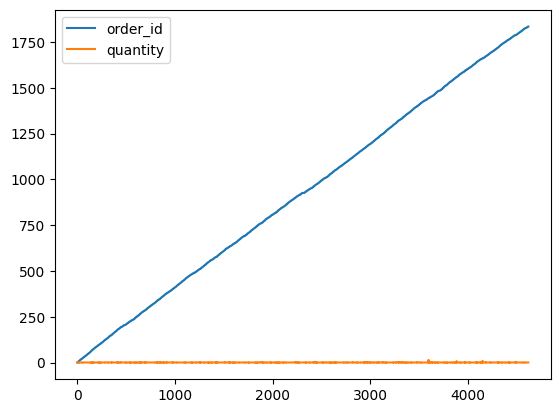

In [14]:
import matplotlib.pyplot as plt
data_copy.plot()
plt.show()

In [19]:
data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [21]:
# Step 1: Remove the dollar sign and strip extra spaces
data_copy['item_price'] = data_copy['item_price'].str.replace('$', '', regex=False).str.strip()

# Step 2: Convert to float
data_copy['item_price'] = data_copy['item_price'].astype(float)

# Check the result
print(data_copy)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  \
0                                                    NA        2.39   
1                                          [Clementin

<Axes: xlabel='order_id', ylabel='quantity'>

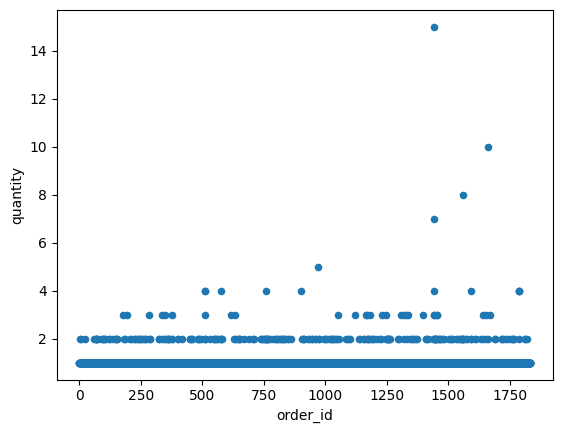

In [24]:
data_copy.plot(kind = 'scatter', x = 'order_id', y = 'quantity')

<Axes: ylabel='Frequency'>

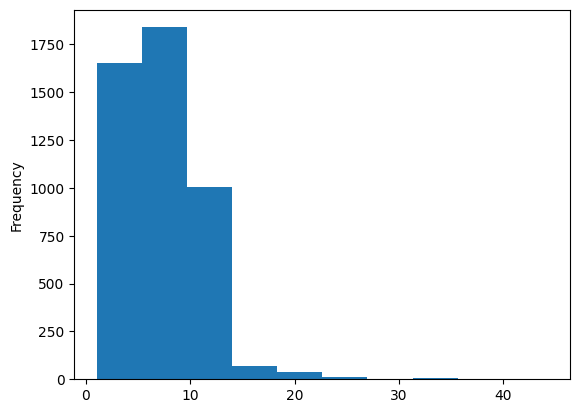

In [26]:
data_copy['item_price'].plot(kind='hist')